I_0: 1.739787104246693 +- 0.010304712050201153
eta: -0.8410405538472191 +- 0.009783445210013926
xi: -0.33821179746447233 +- 0.008534093405273344


C:\Users\victo\AppData\Local\Temp\ipykernel_13964\175700536.py:43: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico.plot(xData, yData, 'D', marker = '.', color = 'red')


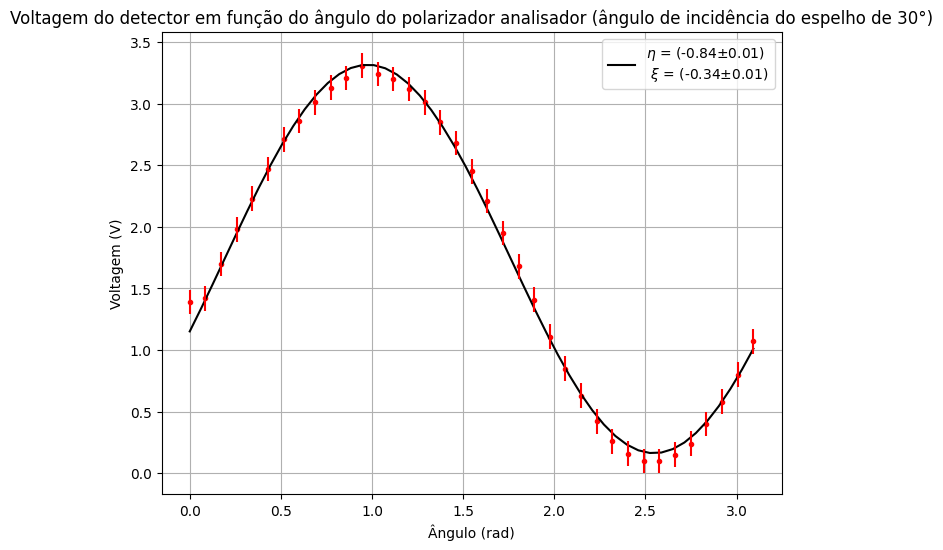

In [33]:
import numpy as np
import pandas as pd
import scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

dados = pd.read_csv('Dados/dados30.txt', sep="\t", header = 0)
dadosArray = np.array(dados)
xData = []
yData = []
Dy = []

for i in dadosArray:
    xData.append(float(i[0]))
    yData.append(float(i[1]))
    Dy.append(float(i[2]))

def func(x, i0, eta, xi):
    return i0*(1.0 - eta*np.sin(2*x) + xi*np.cos(2*x))

popt, pcov = curve_fit(
    f = func,
    xdata = xData,
    ydata = yData,
    sigma = Dy
)

i0_p, eta_p, xi_p = popt
perr = np.sqrt(np.diag(pcov))
Di0, Deta, Dxi = perr

print("I_0:", i0_p,"+-", Di0)
print("eta:", eta_p,"+-", Deta)
print("xi:", xi_p,"+-", Dxi)

def dataPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    grafico = f.add_subplot(111)

    # plot dos pontos
    grafico.plot(xData, yData, 'D', marker = '.', color = 'red')

    # define ajuste a partir dos parametros
    xModel = np.linspace(min(xData), max(xData))
    yModel = func(xModel, i0_p, eta_p, xi_p)

    # plot do ajuste
    grafico.plot(xModel, yModel, label= str("$\eta$ = (%1.2f$\pm$%1.2f)\n " % (eta_p, Deta) + "$\\xi$ = (%1.2f$\pm$%1.2f)" % (xi_p, Dxi)), color = 'black')
    grafico.errorbar(xData, yData, yerr = Dy, ls='None', color = 'red')

    grafico.grid(True)
    grafico.set_xlabel('Ângulo (rad)') # eixo x
    grafico.set_ylabel('Voltagem (V)') # eixo y
    grafico.set_title('Voltagem do detector em função do ângulo do polarizador analisador (ângulo de incidência do espelho de 30°)') #título
    grafico.legend(loc = 'upper right')
    
    plt.savefig('Acr25graus.png')
    plt.show()
    plt.close('all')

graphWidth = 800
graphHeight = 600
dataPlot(graphWidth, graphHeight)

# Resíduos:

yAjuste = []
for i in xData:
    np.append(yAjuste,func(i, i0_p, eta_p, xi_p))

residuosAbsolutos = []
for i in yAjuste:
    np.append(residuosAbsolutos, yData[i] - yAjuste[i])

C:\Users\victo\AppData\Local\Temp\ipykernel_13964\4119287204.py:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico.plot(xData, residuosAbsolutos, 'D', marker = '.', color = 'red')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


37
Chi quadrado = 13.35


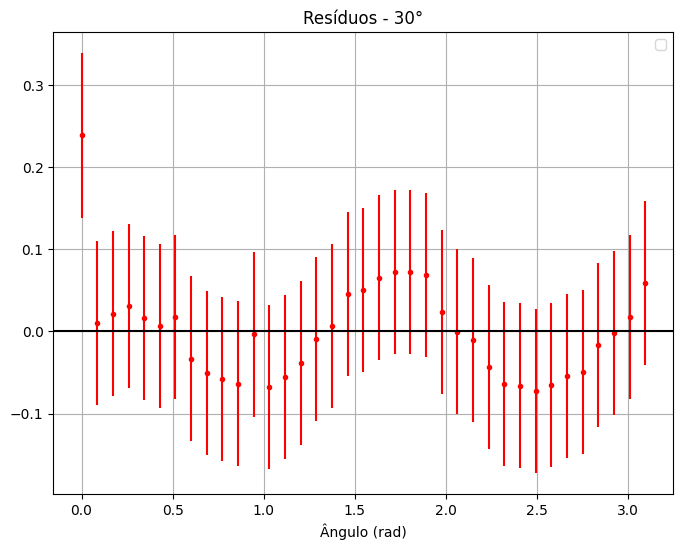

In [34]:
# Resíduos:
def x0(x):
    return 0

yAjuste = []
for i in xData:
    yAjuste.append(func(i, i0_p, eta_p, xi_p))

residuosAbsolutos = []
for i, ponto in enumerate(yAjuste):
    residuosAbsolutos.append(yData[i] - yAjuste[i])

chiQuadrado2 = 0

print(len(xData))

for i, residuo in enumerate(residuosAbsolutos):
    chiQuadrado2 += residuosAbsolutos[i]**2/Dy[i]**2

print("Chi quadrado = %1.2f" % chiQuadrado2)

def dataPlot2(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    grafico = f.add_subplot(111)
    # plot dos resíduos
    grafico.plot(xData, residuosAbsolutos, 'D', marker = '.', color = 'red')

    # plot das barras de erro
    grafico.errorbar(xData, residuosAbsolutos, yerr = Dy, ls='None', color = 'red')

    grafico.grid(True)
    grafico.axhline(0,0, max(xData), color = 'black')
    grafico.set_xlabel('Ângulo (rad)') # eixo x
    grafico.set_title('Resíduos - 30°') #título
    grafico.legend(loc = 'upper right')
    
    plt.savefig('Resíduos30.png')
    plt.show()
    plt.close('all')

graphWidth = 800
graphHeight = 600
dataPlot2(graphWidth, graphHeight)

I_0: 2.0403771945356537 +- 0.011130673394548504
eta: -0.7316321196295954 +- 0.008814981903533215
xi: -0.3931229551661347 +- 0.007764390167055065


C:\Users\victo\AppData\Local\Temp\ipykernel_13964\2996896789.py:43: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico.plot(xData, yData, 'D', marker = '.', color = 'red')


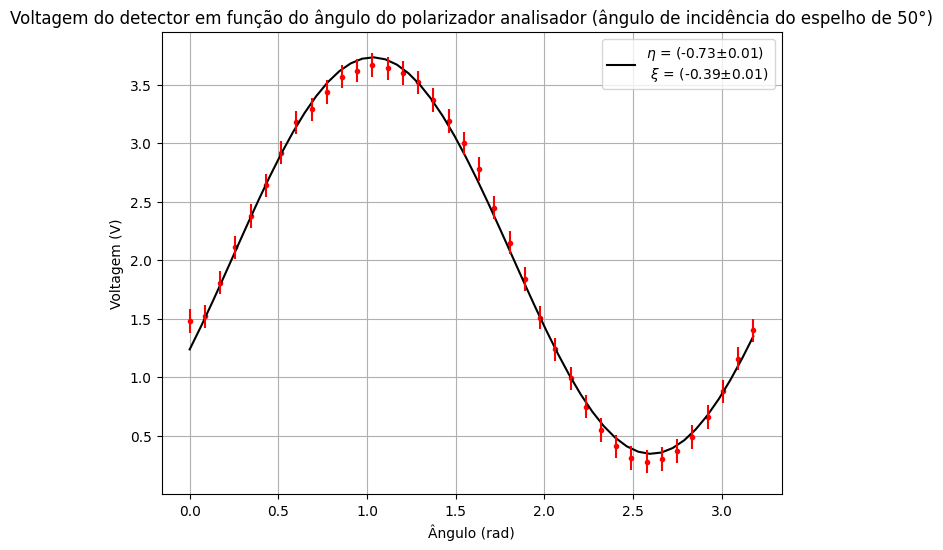

In [35]:
import numpy as np
import pandas as pd
import scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

dados = pd.read_csv('Dados/dados50.txt', sep="\t", header = 0)
dadosArray = np.array(dados)
xData = []
yData = []
Dy = []

for i in dadosArray:
    xData.append(float(i[0]))
    yData.append(float(i[1]))
    Dy.append(float(i[2]))

def func(x, i0, eta, xi):
    return i0*(1.0 - eta*np.sin(2*x) + xi*np.cos(2*x))

popt, pcov = curve_fit(
    f = func,
    xdata = xData,
    ydata = yData,
    sigma = Dy
)

i0_p, eta_p, xi_p = popt
perr = np.sqrt(np.diag(pcov))
Di0, Deta, Dxi = perr

print("I_0:", i0_p,"+-", Di0)
print("eta:", eta_p,"+-", Deta)
print("xi:", xi_p,"+-", Dxi)

def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    grafico = f.add_subplot(111)

        # plot dos pontos
    grafico.plot(xData, yData, 'D', marker = '.', color = 'red')

    # define ajuste a partir dos parametros
    xModel = np.linspace(min(xData), max(xData))
    yModel = func(xModel, i0_p, eta_p, xi_p)

    # plot do ajuste
    grafico.plot(xModel, yModel, label= str("$\eta$ = (%1.2f$\pm$%1.2f)\n " % (eta_p, Deta) + "$\\xi$ = (%1.2f$\pm$%1.2f)" % (xi_p, Dxi)), color = 'black')
    grafico.errorbar(xData, yData, yerr = Dy, ls='None', color = 'red')

    grafico.grid(True)
    grafico.set_xlabel('Ângulo (rad)') # eixo x
    grafico.set_ylabel('Voltagem (V)') # eixo y
    grafico.set_title('Voltagem do detector em função do ângulo do polarizador analisador (ângulo de incidência do espelho de 50°)') #título
    grafico.legend(loc = 'upper right')

    plt.savefig('Acr45graus.png')
    plt.show()
    plt.close('all')
graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

C:\Users\victo\AppData\Local\Temp\ipykernel_13964\1067034453.py:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico.plot(xData, residuosAbsolutos, 'D', marker = '.', color = 'red')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


38
Chi quadrado = 16.43


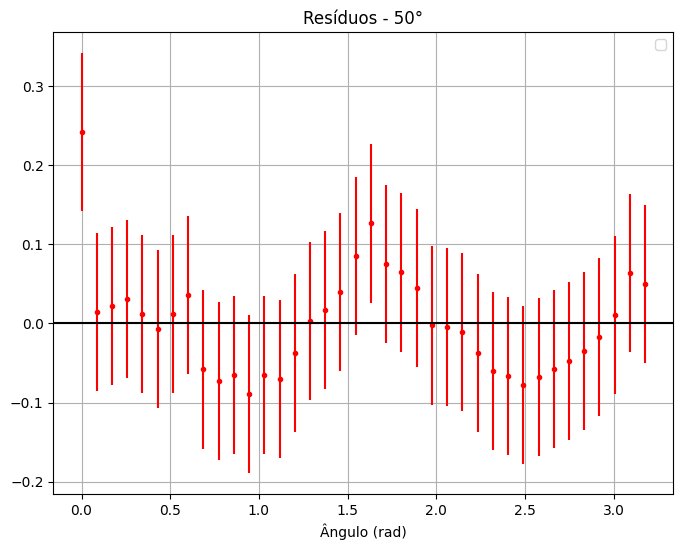

In [36]:
# Resíduos:
def x0(x):
    return 0

yAjuste = []
for i in xData:
    yAjuste.append(func(i, i0_p, eta_p, xi_p))

residuosAbsolutos = []
for i, ponto in enumerate(yAjuste):
    residuosAbsolutos.append(yData[i] - yAjuste[i])

chiQuadrado2 = 0

print(len(xData))

for i, residuo in enumerate(residuosAbsolutos):
    chiQuadrado2 += residuosAbsolutos[i]**2/Dy[i]**2

print("Chi quadrado = %1.2f" % chiQuadrado2)

def dataPlot2(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    grafico = f.add_subplot(111)
    # plot dos resíduos
    grafico.plot(xData, residuosAbsolutos, 'D', marker = '.', color = 'red')

    # plot das barras de erro
    grafico.errorbar(xData, residuosAbsolutos, yerr = Dy, ls='None', color = 'red')

    grafico.grid(True)
    grafico.axhline(0,0, max(xData), color = 'black')
    grafico.set_xlabel('Ângulo (rad)') # eixo x
    grafico.set_title('Resíduos - 50°') #título
    grafico.legend(loc = 'upper right')
    
    plt.savefig('Resíduos50.png')
    plt.show()
    plt.close('all')

graphWidth = 800
graphHeight = 600
dataPlot2(graphWidth, graphHeight)

I_0: 1.7541547724818167 +- 0.006317111377560162
eta: -0.3867430899133221 +- 0.005369960085638905
xi: -0.437482561805962 +- 0.005163980953336746


C:\Users\victo\AppData\Local\Temp\ipykernel_13964\2037495914.py:42: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico.plot(xData, yData, 'D', marker = '.', color = 'red')


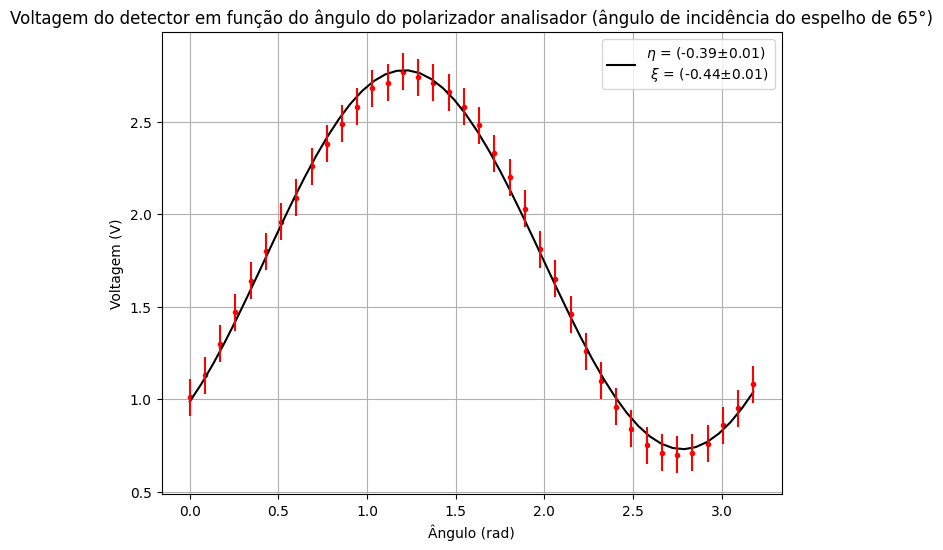

In [37]:
import numpy as np
import pandas as pd
import scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

dados = pd.read_csv('Dados/dados65.txt', sep="\t", header = 0)
dadosArray = np.array(dados)
xData = []
yData = []
Dy = []
for i in dadosArray:
    xData.append(float(i[0]))
    yData.append(float(i[1]))
    Dy.append(float(i[2]))

def func(x, i0, eta, xi):
    return i0*(1.0 - eta*np.sin(2*x) + xi*np.cos(2*x))

popt, pcov = curve_fit(
    f = func,
    xdata = xData,
    ydata = yData,
    sigma = Dy
)

i0_p, eta_p, xi_p = popt
perr = np.sqrt(np.diag(pcov))
Di0, Deta, Dxi = perr

print("I_0:", i0_p,"+-", Di0)
print("eta:", eta_p,"+-", Deta)
print("xi:", xi_p,"+-", Dxi)

def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    grafico = f.add_subplot(111)

        # plot dos pontos
    grafico.plot(xData, yData, 'D', marker = '.', color = 'red')

    # define ajuste a partir dos parametros
    xModel = np.linspace(min(xData), max(xData))
    yModel = func(xModel, i0_p, eta_p, xi_p)

    # plot do ajuste
    grafico.plot(xModel, yModel, label= str("$\eta$ = (%1.2f$\pm$%1.2f)\n " % (eta_p, Deta) + "$\\xi$ = (%1.2f$\pm$%1.2f)" % (xi_p, Dxi)), color = 'black')
    grafico.errorbar(xData, yData, yerr = Dy, ls='None', color = 'red')

    grafico.grid(True)
    grafico.set_xlabel('Ângulo (rad)') # eixo x
    grafico.set_ylabel('Voltagem (V)') # eixo y
    grafico.set_title('Voltagem do detector em função do ângulo do polarizador analisador (ângulo de incidência do espelho de 65°)') #título
    grafico.legend(loc = 'upper right')

    plt.savefig('Acr65graus.png')
    plt.show()
    plt.close('all')
graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

C:\Users\victo\AppData\Local\Temp\ipykernel_13964\396546084.py:24: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  grafico.plot(xData, residuosAbsolutos, 'D', marker = '.', color = 'red')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Chi quadrado = 5.29


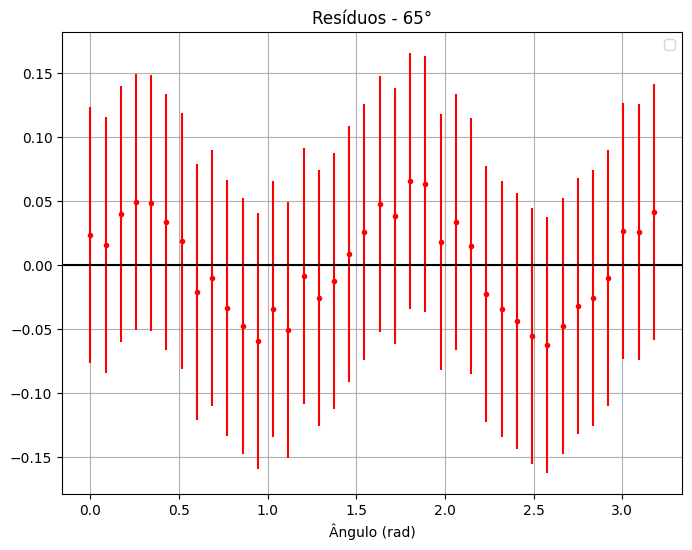

In [38]:
# Resíduos:
def x0(x):
    return 0

yAjuste = []
for i in xData:
    yAjuste.append(func(i, i0_p, eta_p, xi_p))

residuosAbsolutos = []
for i, ponto in enumerate(yAjuste):
    residuosAbsolutos.append(yData[i] - yAjuste[i])

chiQuadrado2 = 0

for i, residuo in enumerate(residuosAbsolutos):
    chiQuadrado2 += residuosAbsolutos[i]**2/Dy[i]**2

print("Chi quadrado = %1.2f" % chiQuadrado2)

def dataPlot2(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    grafico = f.add_subplot(111)
    # plot dos resíduos
    grafico.plot(xData, residuosAbsolutos, 'D', marker = '.', color = 'red')

    # plot das barras de erro
    grafico.errorbar(xData, residuosAbsolutos, yerr = Dy, ls='None', color = 'red')

    grafico.grid(True)
    grafico.axhline(0,0, max(xData), color = 'black')
    grafico.set_xlabel('Ângulo (rad)') # eixo x
    grafico.set_title('Resíduos - 65°') #título
    grafico.legend(loc = 'upper right')
    
    plt.savefig('Resíduos65.png')
    plt.show()
    plt.close('all')

graphWidth = 800
graphHeight = 600
dataPlot2(graphWidth, graphHeight)